#Рубежный контроль №1

Студен группы ИУ5-21М Андреев Кирилл. Вариант 1. Набор данных 1.

##Задание

Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных с использованием библиотек Matplotlib и Seaborn. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков? Проведите корреляционный анализ. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

##Решение

###Импорт библотек и загрузка данных

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [0]:
data = make_dataframe(load_boston)

Оценим данные

In [0]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CRIM - 0
ZN - 0
INDUS - 0
CHAS - 0
NOX - 0
RM - 0
AGE - 0
DIS - 0
RAD - 0
TAX - 0
PTRATIO - 0
B - 0
LSTAT - 0
target - 0


Нет пропусков

In [0]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

Типы данных пригодны для анализа

In [0]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
data.shape

(506, 14)

###Парные диаграммы:

Построим парные диаграммы для визуального анализа зависимостей в данных

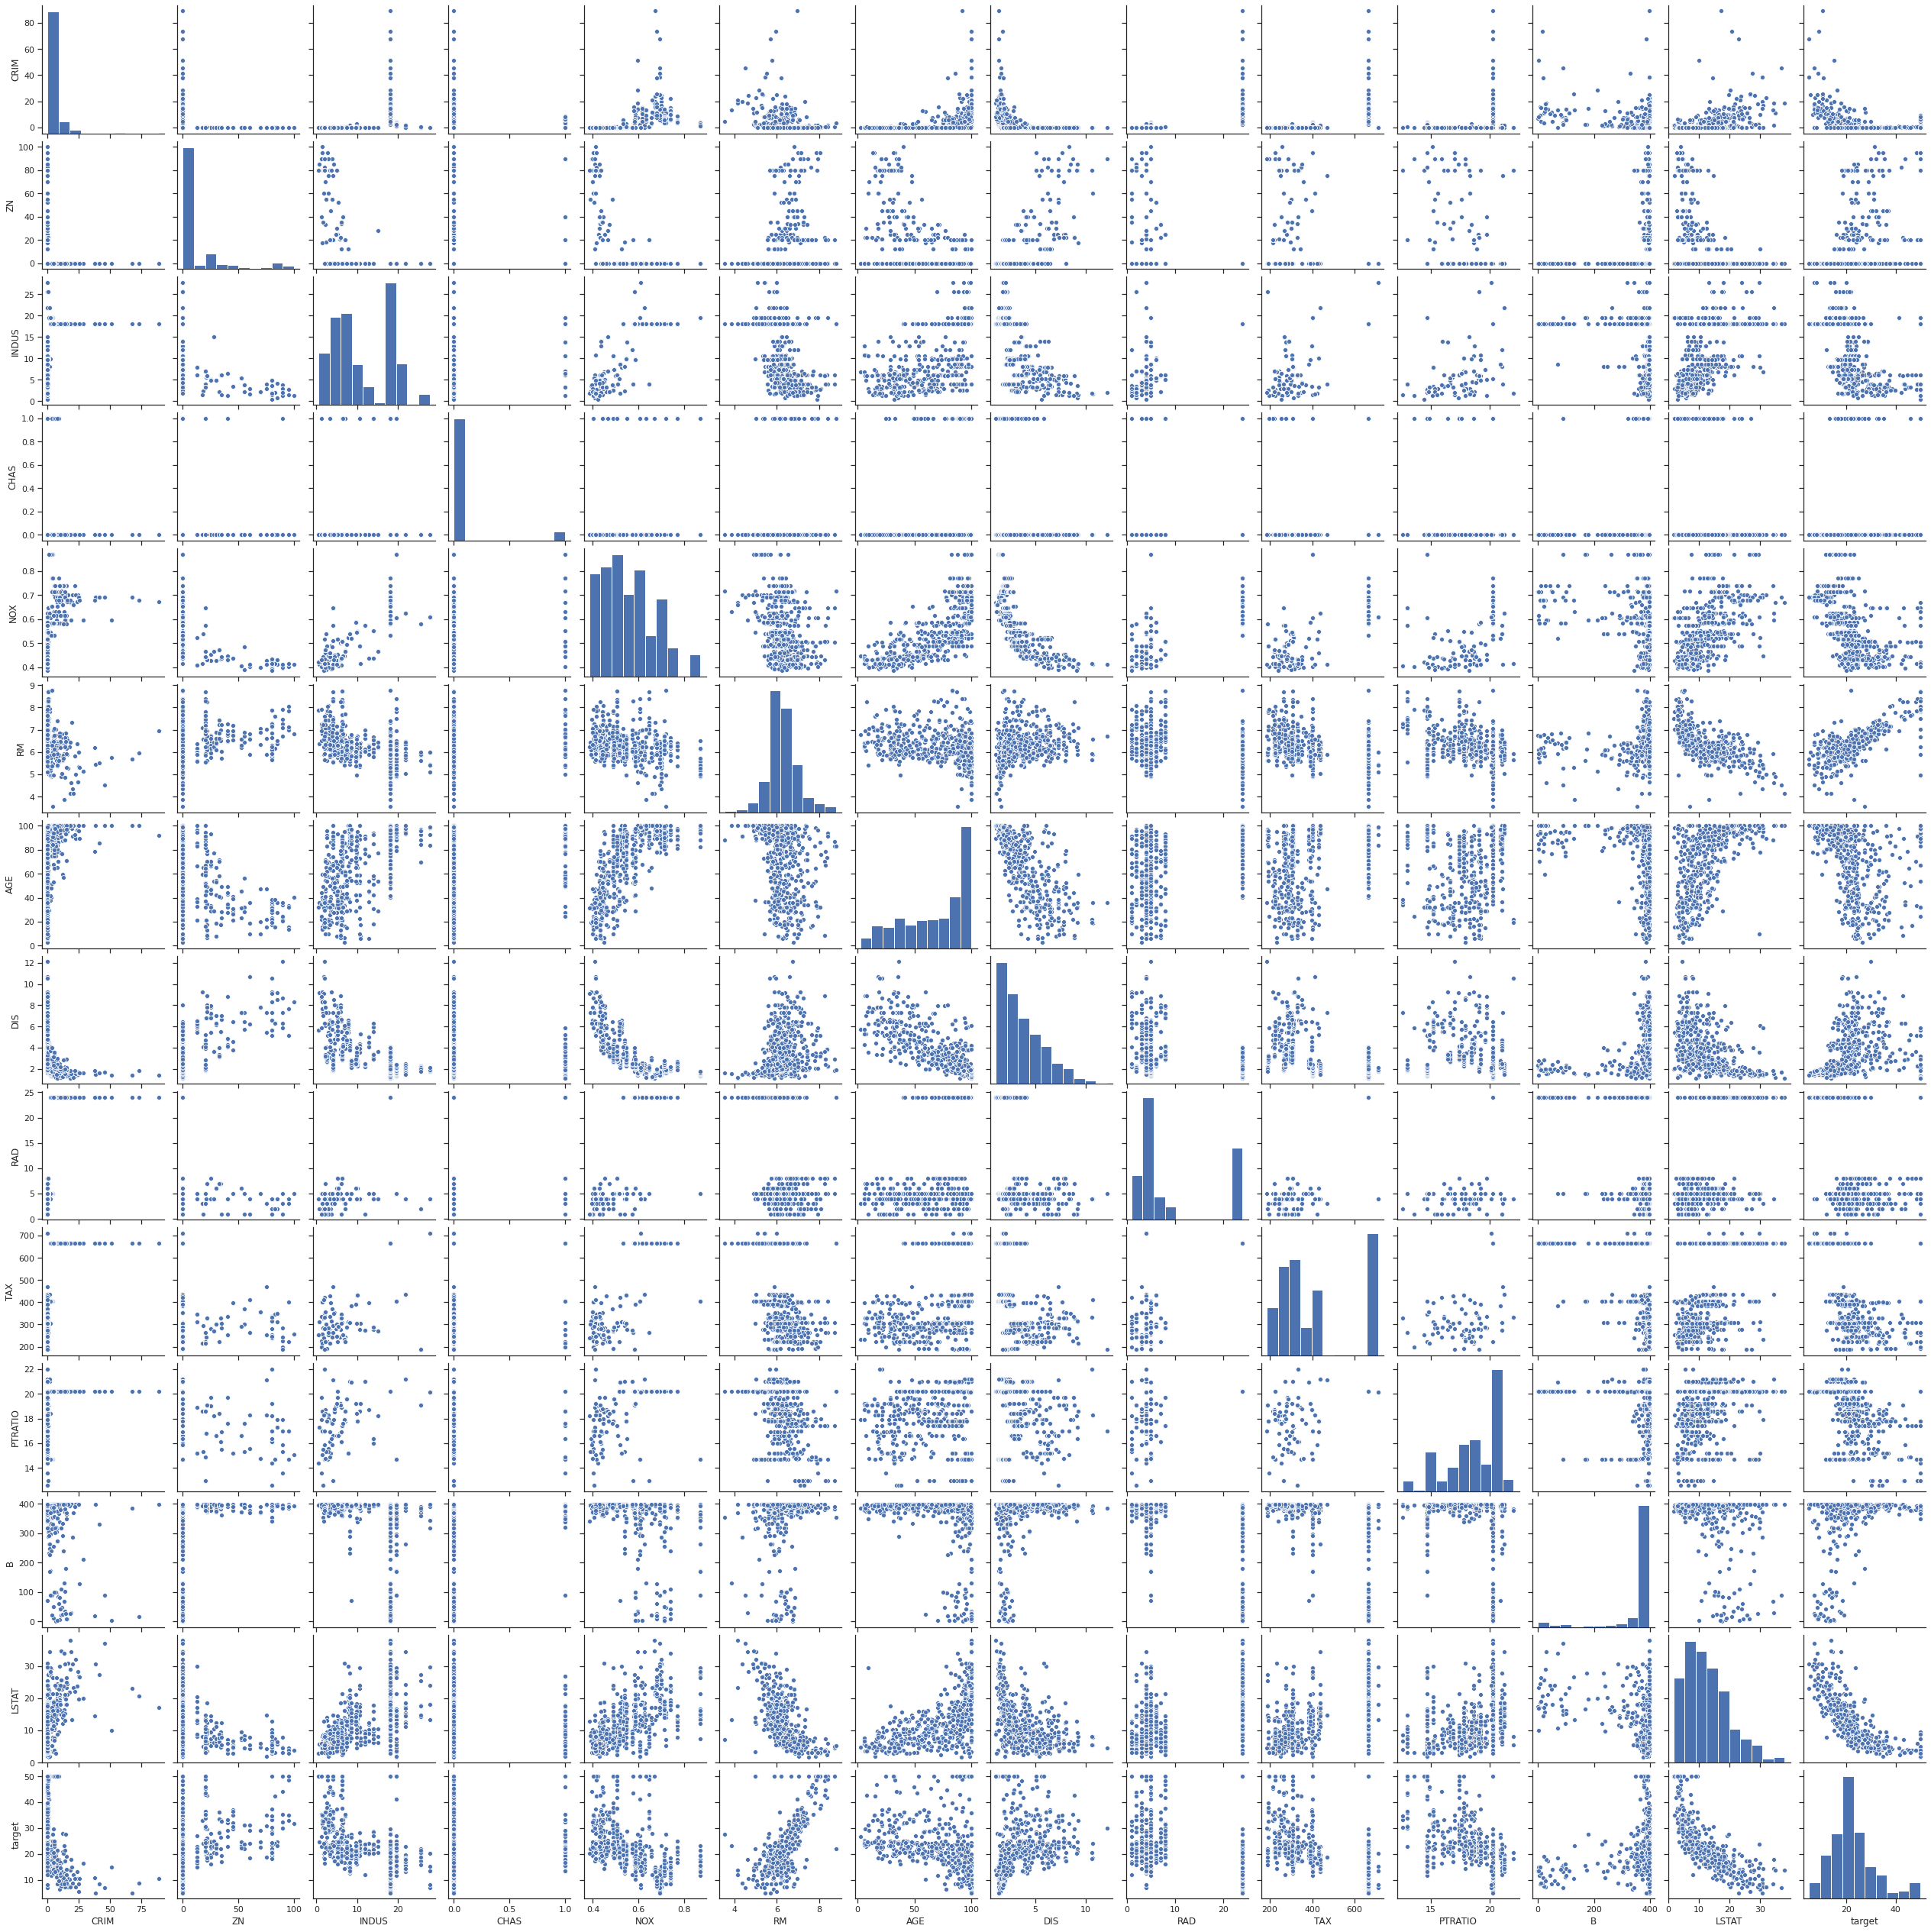

In [0]:
sns.pairplot(data)

В результате быстрого визуального анализа полученных диаграмм выявлена наиболее явная зависимость между целевым признаком (средней стоимостью дома) и RM (средним количеством комнат в доме)

###Гистограмма целевого признака (средней стоимости домов)

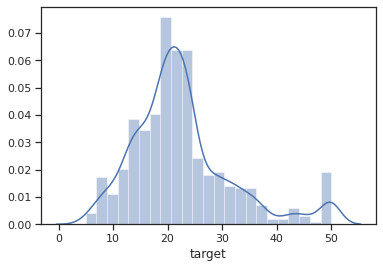

In [0]:
sns.distplot(data["target"])

Из гистограммы заметно, что пиковое количество домов приходится на цены ~20k$. Распределение близко к нормальному.

Jointplot

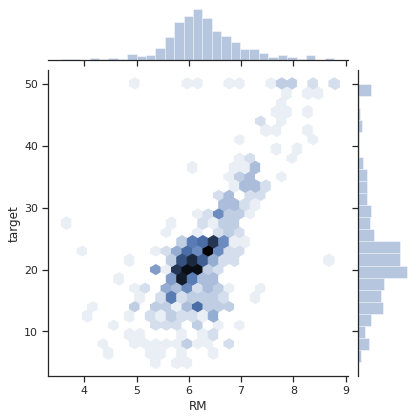

In [0]:
sns.jointplot(x="RM", y="target", data=data, kind="hex")

Вполне логично, что при увеличении среднего числа комнат, возрастает и средняя цена дома. Наиболее популярное сочетание - дом с 6 комнатами стоимостью ~20k$

###Корреляционный анализ

Проведем корреляционный анализ для установления возможных зависимостей между параметрами

In [0]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Тепловая карта для удобства визуальной оценки:

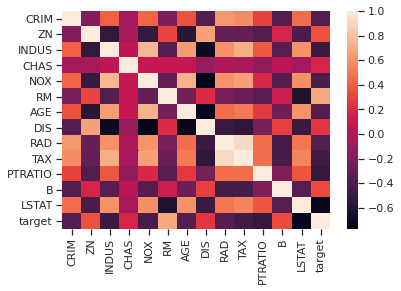

In [0]:
sns.heatmap(data.corr())

Как было отмечено ранее, присутствует высокая коррелляция между средней ценой домов и средним количеством комнат.

Также высокая, но отрицательная корреляция присутствует между целевым признаком и LSTAT (% lower status of the population). Выведем диаграмму рассеяния.

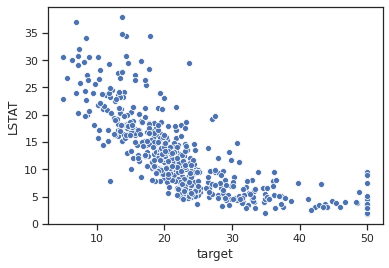

In [0]:
sns.scatterplot(x="target", y="LSTAT", data=data)

Также при анализе корреляций других признаков с целевым, можно заметить, что при увеличении средней цены дома: сокращается уровень преступности, увеличивается доля участков большой площади и уменьшается удельный налог. Построим для них диаграммы рассеяния:

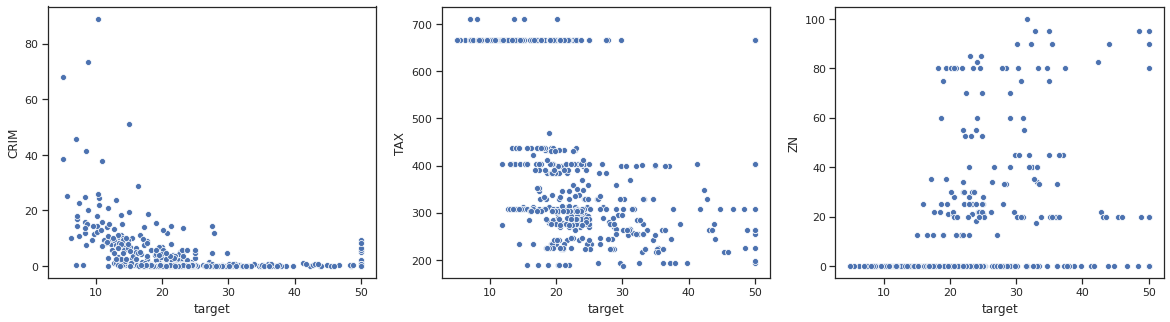

In [0]:
fig, ax =plt.subplots(1,3, figsize=(20,5))
sns.scatterplot(x="target", y="CRIM", data=data, ax=ax[0])
sns.scatterplot(x="target", y="TAX", data=data, ax=ax[1])
sns.scatterplot(x="target", y="ZN", data=data, ax=ax[2])

Также построим гистограммы и диаграмму рассеяния для параметров удельный налог и доступоность дорог, у которых выскоркий коэффициент корреляции:

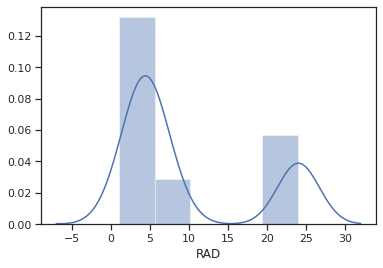

In [0]:
sns.distplot(data["RAD"])


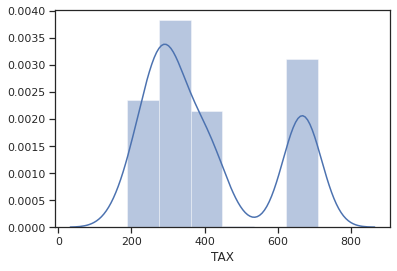

In [0]:
sns.distplot(data["TAX"])

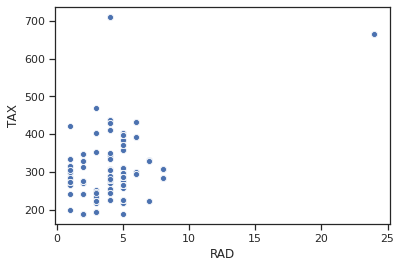

In [0]:
sns.scatterplot(x="RAD", y="TAX", data=data)

В датасете присутствуют признаки, кореллирующие с целевым, причем эти корреляции можно объяснить логически, вследствие чего они вряд ли могут быть ложными.
Некоторую модель машинного обучения можно создать, используя эти данные. Особенно выделяется зависимость целевого признака и признака среднего количества комнат.